In [281]:
import pandas as pd
import numpy as np

#model selection
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_validate

#############
#preprocessing

#missing features


#scaling
from sklearn.preprocessing import StandardScaler

#oversampling
from imblearn.pipeline import Pipeline #can't use standard Pipeline with SMOTE
from imblearn.over_sampling import SMOTE


####################
#models 
from sklearn.tree import DecisionTreeClassifier

from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier



#model_evaluation
from sklearn.metrics import make_scorer, recall_score, precision_score,matthews_corrcoef


In [10]:
df = pd.read_csv("brca_merged_data.csv",index_col= 0)
print(df.shape)
df.head()

(876, 358)


,#Patient Identifier,Sample Identifier,Oncotree Code,Cancer Type,Cancer Type Detailed,Tumor Type,Neoplasm Histologic Grade,Tissue Prospective Collection Indicator,Tissue Retrospective Collection Indicator,Tissue Source Site,...,22_mutcount,3_mutcount,4_mutcount,5_mutcount,6_mutcount,7_mutcount,8_mutcount,9_mutcount,X_mutcount,Y_mutcount
0,TCGA-3C-AALI,TCGA-3C-AALI-01,IDC,Invasive Breast Carcinoma,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,3C,...,9.0,54.0,29.0,32.0,38.0,41.0,32.0,22.0,29.0,NaN
1,TCGA-3C-AALK,TCGA-3C-AALK-01,IDC,Invasive Breast Carcinoma,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,3C,...,3.0,5.0,2.0,9.0,5.0,2.0,NaN,4.0,4.0,NaN
2,TCGA-4H-AAAK,TCGA-4H-AAAK-01,ILC,Invasive Breast Carcinoma,Breast Invasive Lobular Carcinoma,Infiltrating Lobular Carcinoma,NaN,Yes,No,4H,...,NaN,1.0,3.0,2.0,NaN,2.0,2.0,4.0,3.0,NaN
3,TCGA-5T-A9QA,TCGA-5T-A9QA-01,BRCNOS,Invasive Breast Carcinoma,Breast Invasive Carcinoma (NOS),Other,NaN,Yes,No,5T,...,4.0,8.0,8.0,NaN,3.0,4.0,2.0,2.0,10.0,NaN
4,TCGA-A1-A0SF,TCGA-A1-A0SF-01,IDC,Invasive Breast Carcinoma,Breast Invasive Ductal Carcinoma,Infiltrating Ductal Carcinoma,NaN,No,Yes,A1,...,1.0,3.0,6.0,3.0,6.0,6.0,1.0,2.0,1.0,NaN


In [9]:
cols = df.columns

print(cols)

Index(['Unnamed: 0', '#Patient Identifier', 'Sample Identifier',
       'Oncotree Code', 'Cancer Type', 'Cancer Type Detailed', 'Tumor Type',
       'Neoplasm Histologic Grade', 'Tissue Prospective Collection Indicator',
       'Tissue Retrospective Collection Indicator',
       ...
       '22_mutcount', '3_mutcount', '4_mutcount', '5_mutcount', '6_mutcount',
       '7_mutcount', '8_mutcount', '9_mutcount', 'X_mutcount', 'Y_mutcount'],
      dtype='object', length=359)


# Make list of subset of columns that will need to be modeled

In [264]:
model_cols = list(df.columns[18:209])

In [265]:
model_cols

['YWHAE|14-3-3_epsilon',
 'EIF4EBP1|4E-BP1',
 'EIF4EBP1|4E-BP1_pS65',
 'EIF4EBP1|4E-BP1_pT37T46',
 'TP53BP1|53BP1',
 'ACACA ACACB|ACC_pS79',
 'ACACA|ACC1',
 'AKT1 AKT2 AKT3|Akt',
 'AKT1 AKT2 AKT3|Akt_pS473',
 'AKT1 AKT2 AKT3|Akt_pT308',
 'PRKAA1|AMPK_alpha',
 'PRKAA1|AMPK_pT172',
 'AR|AR',
 'ASNS|ASNS',
 'ATM|ATM',
 'BAK1|Bak',
 'BAX|Bax',
 'BCL2|Bcl-2',
 'BCL2L1|Bcl-xL',
 'BECN1|Beclin',
 'CTNNB1|beta-Catenin',
 'BID|Bid',
 'BCL2L11|Bim',
 'JUN|c-Jun_pS73',
 'KIT|c-Kit',
 'MET|c-Met_pY1235',
 'MYC|c-Myc',
 'RAF1|C-Raf',
 'RAF1|C-Raf_pS338',
 'CASP7|Caspase-7_cleavedD198',
 'CAV1|Caveolin-1',
 'PECAM1|CD31',
 'ITGA2|CD49b',
 'CDK1|CDK1',
 'CHEK1|Chk1',
 'CHEK1|Chk1_pS345',
 'CHEK2|Chk2',
 'CHEK2|Chk2_pT68',
 'BIRC2 |cIAP',
 'CLDN7|Claudin-7',
 'COL6A1|Collagen_VI',
 'CCNB1|Cyclin_B1',
 'CCND1|Cyclin_D1',
 'CCNE1|Cyclin_E1',
 'PARK7|DJ-1',
 'DVL3|Dvl3',
 'CDH1|E-Cadherin',
 'EEF2|eEF2',
 'EEF2K|eEF2K',
 'EGFR|EGFR',
 'EGFR|EGFR_pY1068',
 'EGFR|EGFR_pY1173',
 'EIF4E|eIF4E',
 'ESR1|ER-alp

In [48]:
df.iloc[:,127].value_counts()

-0.442846    4
 0.691019    3
 0.000000    2
-0.653635    1
 0.057043    1
            ..
 0.297876    1
 0.654258    1
-0.354947    1
-1.139484    1
-0.391322    1
Name: RB1|Rb_pS807_S811, Length: 870, dtype: int64

In [ ]:
unsure = [9]

## Questions



In [ ]:
#TMB is total number of mutations

keep_idx = [2,9,11,13,14,16]
keep = ["Oncotree Code","Tissue Source Site", "Aneuploidy Score","MSI MANTIS Score","TMB (nonsynonymous)"]

#keep all cols between 18:216

In [ ]:
cols_to_drop = [0,1,3,4,5,6,7,8,10,12,15,17]

In [31]:
df.iloc[:,6]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
871   NaN
872   NaN
873   NaN
874   NaN
875   NaN
Name: Neoplasm Histologic Grade, Length: 876, dtype: float64

In [83]:
df.iloc[:5,250:260]

,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,TTN,PIK3CA,TP53,MUC16,MAP3K1,CDH1
0,0:DiseaseFree,131.669790,0:CENSORED,131.669790,2.0,NaN,1.0,2.0,NaN,NaN
1,NaN,NaN,0:CENSORED,47.604958,NaN,2.0,NaN,NaN,NaN,NaN
2,0:DiseaseFree,11.440971,0:CENSORED,11.440971,NaN,NaN,NaN,NaN,NaN,1.0
3,NaN,NaN,0:CENSORED,9.961535,NaN,NaN,NaN,NaN,NaN,NaN
4,0:DiseaseFree,48.098103,0:CENSORED,48.098103,NaN,NaN,NaN,1.0,NaN,NaN


In [ ]:
"AGE","SEX","ETHNICITY","RACE","WEIGHT"

In [77]:
df["PERSON_NEOPLASM_CANCER_STATUS"].value_counts()

Tumor Free    695
With Tumor     71
Name: PERSON_NEOPLASM_CANCER_STATUS, dtype: int64

In [79]:
df["OS_STATUS"].value_counts()

#notes we are assuming the person dies of cancer

0:LIVING      754
1:DECEASED    122
Name: OS_STATUS, dtype: int64

0:ALIVE OR DEAD TUMOR FREE    791
1:DEAD WITH TUMOR              66
Name: DSS_STATUS, dtype: int64

<AxesSubplot:>

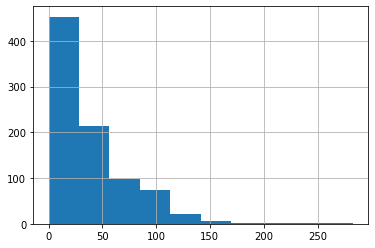

In [82]:
df["DSS_MONTHS"].hist()

In [256]:
df.iloc[:,180:209].isna().sum()

PRDX1|PRDX1                      0
RAB11A RAB11B|Rab11              0
RAB25|Rab25                      0
RPTOR|Raptor                     0
RBM15|RBM15                      0
RICTOR|Rictor                    0
RICTOR|Rictor_pT1135             0
SCD1|SCD1                        0
SRSF1|SF2                        0
WWTR1|TAZ                        0
TIGAR|TIGAR                      0
TGM2|Transglutaminase            0
TFRC|TFRC                        0
TSC1|TSC1                        0
TSC2|Tuberin_pT1462              0
VHL|VHL                          0
XBP1|XBP1                        0
TUBA1B|Acetyl-a-Tubulin-Lys40    0
SQSTM1|p62-LCK-ligand            0
YWHAB|14-3-3_beta                0
YWHAZ|14-3-3_zeta                0
ACVRL1|ACVRL1                    0
DIRAS3|DIRAS3                    0
ANXA1|Annexin-1                  0
PREX1|PREX1                      0
ERCC1|ERCC1                      0
MSH2|MSH2                        0
MSH6|MSH6                        0
DIABLO|Smac         

In [227]:
df.iloc[:,30:50]

,AR|AR,ASNS|ASNS,ATM|ATM,BAK1|Bak,BAX|Bax,BCL2|Bcl-2,BCL2L1|Bcl-xL,BECN1|Beclin,CTNNB1|beta-Catenin,BID|Bid,BCL2L11|Bim,JUN|c-Jun_pS73,KIT|c-Kit,MET|c-Met_pY1235,MYC|c-Myc,RAF1|C-Raf,RAF1|C-Raf_pS338,CASP7|Caspase-7_cleavedD198,CAV1|Caveolin-1,PECAM1|CD31
0,0.295800,0.082284,2.859054,1.190818,1.599181,-1.147306,0.402168,-0.097412,0.608815,1.582274,0.151290,-1.003003,0.621340,0.693300,0.939124,1.293128,0.292942,0.153900,2.059358,-1.441178
1,1.491036,-1.204526,3.319179,0.451765,1.271841,0.056436,-0.233570,-0.791693,1.772495,1.083656,0.482135,-1.247787,3.036708,0.384050,0.832100,1.224468,-0.412164,-0.284561,3.468874,-1.558148
2,1.917243,-0.907969,1.277484,1.143486,1.252343,-0.632766,-0.074598,-0.480634,1.058430,0.790860,0.326254,-1.522674,1.521680,0.330156,-0.060947,1.208489,0.028615,-1.027232,2.146246,-1.706926
3,1.426512,0.613709,3.045319,0.593754,1.269858,-0.147632,-0.183871,-0.878995,1.831955,0.963940,0.732642,-1.185162,-0.485745,0.360830,0.960347,1.199992,-0.034307,-0.723338,0.414565,-1.600073
4,2.207027,-1.519611,2.643819,0.465553,0.934596,0.154100,-0.455447,-0.782150,2.156424,0.480984,0.654316,-0.743734,0.679252,0.146450,1.263635,0.768160,-0.014138,-1.125272,1.424698,-1.362004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1.093749,-0.497431,0.636635,2.641466,2.017932,-1.363097,-0.074006,1.068445,-0.347263,2.601984,-0.382826,-2.355663,0.959631,1.061067,2.393701,1.429960,0.454942,0.047841,5.997996,-1.377361
872,1.149440,-0.568343,3.788651,1.109945,1.460553,0.139896,-0.274526,-0.233932,2.088690,0.976306,1.616984,-0.819207,-0.634837,-0.160613,0.718063,1.330926,-0.146877,-0.233595,2.440111,-2.060096
873,0.218456,-0.516806,2.335887,0.616961,1.300062,-0.359816,-0.332818,-1.011123,0.012962,0.612933,1.025599,-0.988282,-0.580835,-0.068121,0.335623,1.243641,0.020549,-0.588248,1.346396,-1.690181
874,2.870505,-1.375796,2.620078,1.281955,1.723086,-0.046883,-0.238488,-0.995593,-0.211591,1.332136,1.300258,-1.362323,0.879591,0.662205,0.376367,1.224314,0.261751,-0.064116,2.605826,-1.663683


# Variable Selection

- Patient characteristics
- mutation data
- rppa data
- others?



# Target Variable

- "DSS_STATUS"
- others?


In [121]:
df["DSS_STATUS"].value_counts()
df["DSS_STATUS"].isna().sum()
#notes we are assuming the person dies of cancer
# this might be our only option

19

# Variable Selection

- WEIGHT is missing for all 
- "ETHNICITY" is missing for many "ETHNICITY"

In [145]:
df["RACE"].value_counts()

#"SEX","RACE"

White                               623
Black or African American           136
Asian                                59
American Indian or Alaska Native      1
Name: RACE, dtype: int64

In [266]:
model_cols.extend(["AGE","Aneuploidy Score","MSI MANTIS Score","TMB (nonsynonymous)","DSS_STATUS"])

In [267]:
df_model = df.loc[:,model_cols]

In [268]:
df_model.isna().sum()

YWHAE|14-3-3_epsilon        0
EIF4EBP1|4E-BP1             0
EIF4EBP1|4E-BP1_pS65        0
EIF4EBP1|4E-BP1_pT37T46     0
TP53BP1|53BP1               0
                           ..
AGE                         0
Aneuploidy Score           40
MSI MANTIS Score           40
TMB (nonsynonymous)        56
DSS_STATUS                 19
Length: 196, dtype: int64

# Drop rows with missing outcome variable

In [269]:
df_model.dropna(axis = 0, subset= ["DSS_STATUS"],inplace=True)

# Define X and Y values

In [270]:
map_dict = {"0:ALIVE OR DEAD TUMOR FREE" : int(0),
            "1:DEAD WITH TUMOR" : int(1)
           }


X = df_model.loc[:,["AGE","Aneuploidy Score","MSI MANTIS Score","TMB (nonsynonymous)"]]
y = df_model["DSS_STATUS"].map(map_dict)



# import and start very basic models

https://scikit-learn.org/stable/model_selection.html#model-selection

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0,stratify=y)

In [272]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((574, 4), (283, 4), (574,), (283,))

# Preprocessing

- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

- Imputing missing_data  https://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values
- https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py
- scaling data
- PCA (on mutations things like that) or combine them all into one... This would reduce interpretability?
- SMOTE imbalanced dataset
- polynomial features
- enhanced variable selection? ENET or other automated option https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

# Modeling

- Decision Tree 
- KNN
- logistic regression
- gradient boosting
- ensemble
- others

# Model Evaluation

# PIPELINE DEFINE

In [188]:
sensitivity = make_scorer(recall_score, pos_label=1)
specificity = make_scorer(recall_score, pos_label=0)
PPV = make_scorer(precision_score, pos_label=1)
NPV = make_scorer(precision_score, pos_label=0)
MCC = make_scorer(matthews_corrcoef)
score_metrics = {'roc_auc':'roc_auc','accuracy':'accuracy','MCC':MCC,
                 'bal_acc':'balanced_accuracy', 'sensitivity' : sensitivity,
                 'specificity': specificity,'PPV': PPV, 'NPV' : NPV, 'f1':'f1'}

In [282]:
# define pipeline

#SMOTE for oversampling majority and TomekLinks for undersampling majority
imp = IterativeImputer(max_iter=100, random_state=0)
scale = StandardScaler()
over = SMOTE(random_state=0)

model = HistGradientBoostingClassifier()

#defining steps in pipeline
steps = [('impute',imp),('scale', scale), ('over', over), ('model', model)]
pipeline = Pipeline(steps=steps, verbose=1)


#defining CV methods
#using groups to prevent animals from appearing in training and test sets
#group_kfold = GroupKFold(n_splits = 5)




In [283]:
#Evaluate the model
scores = cross_validate(pipeline, X_train, y_train, cv=3,
                        scoring=score_metrics,
                        return_train_score=False, 
                        verbose=1,n_jobs=5)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    1.1s finished


In [284]:
score_df = pd.DataFrame(scores)

In [285]:
score_df.describe()

,fit_time,score_time,test_roc_auc,test_accuracy,test_MCC,test_bal_acc,test_sensitivity,test_specificity,test_PPV,test_NPV,test_f1
count,3.000000,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.245830,7.999897e-03,0.503403,0.813609,0.035014,0.522721,0.179365,0.866076,0.099822,0.927312,0.127697
std,0.018305,8.596304e-07,0.091937,0.016461,0.073501,0.047965,0.099241,0.019507,0.051812,0.005113,0.066660
min,0.225501,7.999182e-03,0.397498,0.802083,-0.049582,0.467918,0.071429,0.847458,0.040000,0.921687,0.051282
25%,0.238240,7.999420e-03,0.473749,0.804183,0.010902,0.505550,0.135714,0.855932,0.084516,0.925129,0.104588
50%,0.250980,7.999659e-03,0.550000,0.806283,0.071386,0.543182,0.200000,0.864407,0.129032,0.928571,0.157895
75%,0.255994,8.000255e-03,0.556356,0.819372,0.077312,0.550122,0.233333,0.875385,0.129734,0.930124,0.165904
max,0.261009,8.000851e-03,0.562712,0.832461,0.083237,0.557062,0.266667,0.886364,0.130435,0.931677,0.173913


In [286]:
#generate CI 

score_df_U95CI = score_df.describe().loc['mean'] + 1.96 * (score_df.describe().loc['std']/ np.sqrt(score_df.describe().loc['count']))
score_df_L95CI = score_df.describe().loc['mean'] - 1.96 * (score_df.describe().loc['std']/ np.sqrt(score_df.describe().loc['count']))

In [287]:
score_sum = dict()
for item in score_df.describe().columns:
    mean = round(score_df.describe()[item]['mean'],3)
    L95 = round(score_df_U95CI[item],3)
    U95 = round(score_df_L95CI[item],3)
    score_sum[item]= ((f'{mean}({L95}-{U95})'))
    
score_summary = pd.Series(score_sum)


In [288]:
score_summary

fit_time             0.246(0.267-0.225)
score_time           0.008(0.008-0.008)
test_roc_auc         0.503(0.607-0.399)
test_accuracy        0.814(0.832-0.795)
test_MCC            0.035(0.118--0.048)
test_bal_acc         0.523(0.577-0.468)
test_sensitivity     0.179(0.292-0.067)
test_specificity     0.866(0.888-0.844)
test_PPV               0.1(0.158-0.041)
test_NPV             0.927(0.933-0.922)
test_f1              0.128(0.203-0.052)
dtype: object